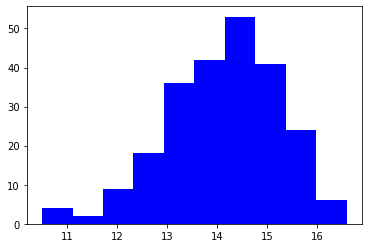

[ 4.  2.  9. 18. 36. 42. 53. 41. 24.  6.]
[10.5   11.109 11.718 12.327 12.936 13.545 14.154 14.763 15.372 15.981
 16.59 ]
[2.         1.41421356 3.         4.24264069 6.         6.4807407
 7.28010989 6.40312424 4.89897949 2.44948974 0.        ]

SF count:  235.0


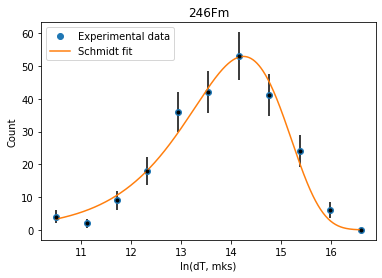

Lambda:  6.493063785568576e-07
n0:  143.80889943665454
n0 / bin_size:  236.13940794196148
Cov:  [[1.12722011e-15 1.45284388e-10]
 [1.45284388e-10 2.76536509e+01]]
Max:  14.24736115373641
T1/2, mks:  1540104.9997731284
Err(T1/2)+, mks:  83977.46741650836
Err(T1/2)-, mks:  -75719.89414193016


In [118]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

# Schmidt fit
# Eur.Phys.J.A(2000)8:141-145 https://link.springer.com/content/pdf/10.1007/s100500070129.pdf
# Z.Phys.A-AtomsandNuclei316,19-26(1984) https://link.springer.com/content/pdf/10.1007/BF01415656.pdf

times_mks = np.array([36524, 43330, 52955, 54271, 113700, 121933, 134890, 144682, 148865, 155592, 164368, 181860, 188046, 196222, 202754, 226749, 242346, 249782, 258321, 271440, 281185, 296368, 299862, 300615, 312508, 315593, 336648, 370767, 383361, 389309, 389374, 397739, 398456, 423094, 439250, 452550, 457111, 472086, 519749, 520160, 542842, 543900, 547212, 560199, 568640, 569050, 569147, 572258, 595751, 605581, 608221, 611537, 635777, 641818, 651118, 657705, 659498, 680663, 686695, 687737, 691133, 693151, 695360, 704195, 714467, 718245, 729140, 734282, 739135, 765680, 770597, 776670, 791079, 791281, 830004, 831423, 835344, 845631, 855774, 857804, 857904, 863115, 875960, 923219, 940752, 942173, 969721, 1.01844E6, 1.02154E6, 1.04026E6, 1.06026E6, 1.07073E6, 1.07647E6, 1.09406E6, 1.09585E6, 1.10289E6, 1.1368E6, 1.14767E6, 1.16581E6, 1.17554E6, 1.2055E6, 1.20764E6, 1.22948E6, 1.25052E6, 1.25893E6, 1.26667E6, 1.29691E6, 1.30436E6, 1.35465E6, 1.36076E6, 1.39357E6, 1.42259E6, 1.43151E6, 1.47927E6, 1.47953E6, 1.48246E6, 1.5013E6, 1.51279E6, 1.534E6, 1.54131E6, 1.55265E6, 1.5636E6, 1.56714E6, 1.57289E6, 1.57694E6, 1.57833E6, 1.64007E6, 1.66297E6, 1.66752E6, 1.67005E6, 1.71086E6, 1.71917E6, 1.72574E6, 1.74577E6, 1.74832E6, 1.78726E6, 1.84991E6, 1.85314E6, 1.86772E6, 1.91093E6, 1.91987E6, 1.94286E6, 1.95048E6, 1.96764E6, 1.99648E6, 2.0157E6, 2.0836E6, 2.08462E6, 2.08593E6, 2.1052E6, 2.11502E6, 2.13059E6, 2.14588E6, 2.14801E6, 2.29846E6, 2.34736E6, 2.36947E6, 2.41603E6, 2.42512E6, 2.45456E6, 2.52137E6, 2.55297E6, 2.56087E6, 2.56741E6, 2.59796E6, 2.61277E6, 2.62263E6, 2.63611E6, 2.64752E6, 2.74567E6, 2.82044E6, 2.82444E6, 2.99642E6, 3.0767E6, 3.11527E6, 3.13229E6, 3.13974E6, 3.16848E6, 3.18782E6, 3.22119E6, 3.31206E6, 3.32692E6, 3.33157E6, 3.38756E6, 3.39045E6, 3.45728E6, 3.47505E6, 3.58018E6, 3.59584E6, 3.65087E6, 3.65386E6, 3.71367E6, 3.8099E6, 3.92573E6, 3.93779E6, 4.21417E6, 4.33484E6, 4.42146E6, 4.4983E6, 4.51007E6, 4.51445E6, 4.5346E6, 4.56178E6, 4.58506E6, 4.71364E6, 4.94311E6, 4.95928E6, 5.22799E6, 5.2896E6, 5.30529E6, 5.43087E6, 5.6916E6, 5.71718E6, 6.06616E6, 6.09879E6, 6.10864E6, 6.18989E6, 6.32579E6, 6.83541E6, 7.19457E6, 7.21487E6, 7.25257E6, 7.33612E6, 7.6793E6, 7.75131E6, 7.97512E6, 7.99551E6, 8.4153E6, 8.46129E6, 8.75199E6, 8.90905E6, 9.07541E6, 9.08037E6, 9.71414E6, 1.06572E7])
times_ln = np.log(times_mks)
bin_size = 0.609
counts, bins, bars = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=bin_size), color='blue')
plt.show()
print(counts)
print(bins)

x = bins
y = np.append(counts, 0)
dy = np.array(list(map(lambda c : np.sqrt(c), y)))
print(dy)

sf = np.sum(y)
print("\nSF count: ", sf)
n0_approx = sf * bin_size
lam_approx = 6.4935e-07

def func(x, lam, n0):
    return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam)))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def fit_param_errors(pcov_matrix):
    return np.sqrt(np.diag(pcov_matrix))

popt, pcov = optimize.curve_fit(func, x, y, [lam_approx, n0_approx])

x_cont = np.arange(x.min(), x.max(), 0.01)

plt.plot(x, y, "o", label='Experimental data')
plt.errorbar(x, y, yerr=dy, fmt='.k')
plt.plot(x_cont, func(x_cont, *popt), label='Schmidt fit')
# plt.plot(x_cont, func(x_cont, lam_approx, n0_approx), label='Schmidt distr. for known T1/2')
plt.legend()
plt.title('246Fm')
plt.xlabel('ln(dT, mks)')
plt.ylabel('Count')
plt.show()

print("Lambda: ", popt[0])
print("n0: ", popt[1])
print("n0 / bin_size: ", popt[1]/bin_size)
print("Cov: ", pcov)
hl = 1/popt[0]
print("Max: ", np.log(hl))
print("T1/2, mks: ", hl)
err = fit_param_errors(pcov)[0]
print("Err(T1/2)+, mks: ", (1/(popt[0]-err))-hl)
print("Err(T1/2)-, mks: ", (1/(popt[0]+err))-hl)

In [5]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
from scipy.integrate import quad
integral = quad(func, 0, 20, args=(popt[0], popt[1]/bin_size))
print("Integral: ", integral)

Integral:  (236.2691635076029, 6.753650976104586e-07)


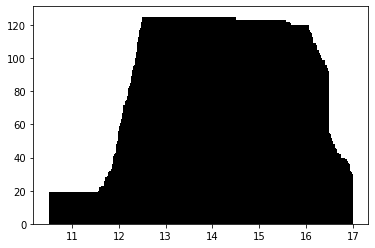

In [6]:
xx1 = []
yy1 = []
zz1 = []
for i in range(100, 2000, 1):
    b = i / 1000
    counts1, bins1, bars1 = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=b), color='black')
    x1 = bins1
    y1 = np.append(counts1, 0)
    popt1, pcov1 = optimize.curve_fit(func, x1, y1, [lam_approx, sf * b])
    hl1 = 1/popt1[0]
    err1 = fit_param_errors(pcov1)[0]
    xx1 = np.append(xx1, b)
    yy1 = np.append(yy1, hl1/1000000)
    zz1 = np.append(zz1, err1)

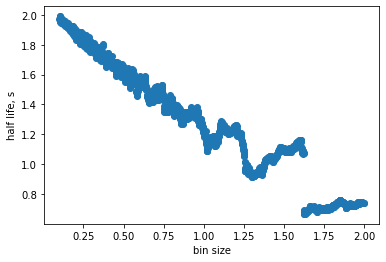

In [7]:
plt.plot(xx1, yy1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('half life, s')
plt.show()

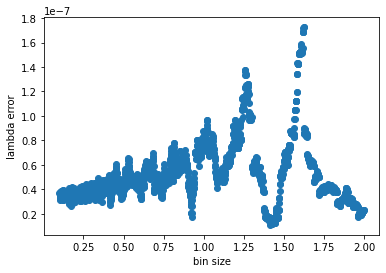

In [8]:
plt.plot(xx1, zz1, "o", label='test bins')
plt.xlabel('bin size')
plt.ylabel('lambda error')
plt.show()